In [334]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [335]:
df = pd.read_csv('Almond.csv')
df.head()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [336]:
colum = df.columns

In [337]:
colum

Index(['Unnamed: 0', 'Length (major axis)', 'Width (minor axis)',
       'Thickness (depth)', 'Area', 'Perimeter', 'Roundness', 'Solidity',
       'Compactness', 'Aspect Ratio', 'Eccentricity', 'Extent',
       'Convex hull(convex area)', 'Type'],
      dtype='object')

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2803 non-null   int64  
 1   Length (major axis)       1946 non-null   float64
 2   Width (minor axis)        1861 non-null   float64
 3   Thickness (depth)         1799 non-null   float64
 4   Area                      2803 non-null   float64
 5   Perimeter                 2803 non-null   float64
 6   Roundness                 1946 non-null   float64
 7   Solidity                  2803 non-null   float64
 8   Compactness               2803 non-null   float64
 9   Aspect Ratio              1004 non-null   float64
 10  Eccentricity              1004 non-null   float64
 11  Extent                    2803 non-null   float64
 12  Convex hull(convex area)  2803 non-null   float64
 13  Type                      2803 non-null   object 
dtypes: float

In [339]:
df.isnull().sum()

Unnamed: 0                     0
Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64

In [340]:
df = df.drop(columns=['Length (major axis)','Width (minor axis)','Width (minor axis)','Roundness','Aspect Ratio','Eccentricity'])
df.shape

(2803, 9)

In [341]:
df

,Unnamed: 0,Thickness (depth),Area,Perimeter,Solidity,Compactness,Extent,Convex hull(convex area),Type
0,0,127.759132,22619.0,643.813269,0.973384,1.458265,0.681193,23237.5,MAMRA
1,1,128.199509,23038.0,680.984841,0.957304,1.601844,0.656353,24065.5,MAMRA
2,2,125.796547,22386.5,646.943212,0.967270,1.487772,0.683620,23144.0,MAMRA
3,3,125.918808,22578.5,661.227483,0.965512,1.540979,0.685360,23385.0,MAMRA
4,4,107.253448,19068.0,624.842706,0.951450,1.629395,0.714800,20041.0,MAMRA
...,...,...,...,...,...,...,...,...,...
2798,2798,122.356506,18471.5,653.345233,0.931000,1.838965,0.725739,19840.5,SANORA
2799,2799,118.708961,17213.5,581.688379,0.952706,1.564234,0.714016,18068.0,SANORA
2800,2800,119.147224,17510.5,608.315795,0.948821,1.681705,0.718999,18455.0,SANORA
2801,2801,120.634438,17941.0,630.759446,0.944810,1.764701,0.738191,18989.0,SANORA


In [342]:
df.duplicated().sum()

0

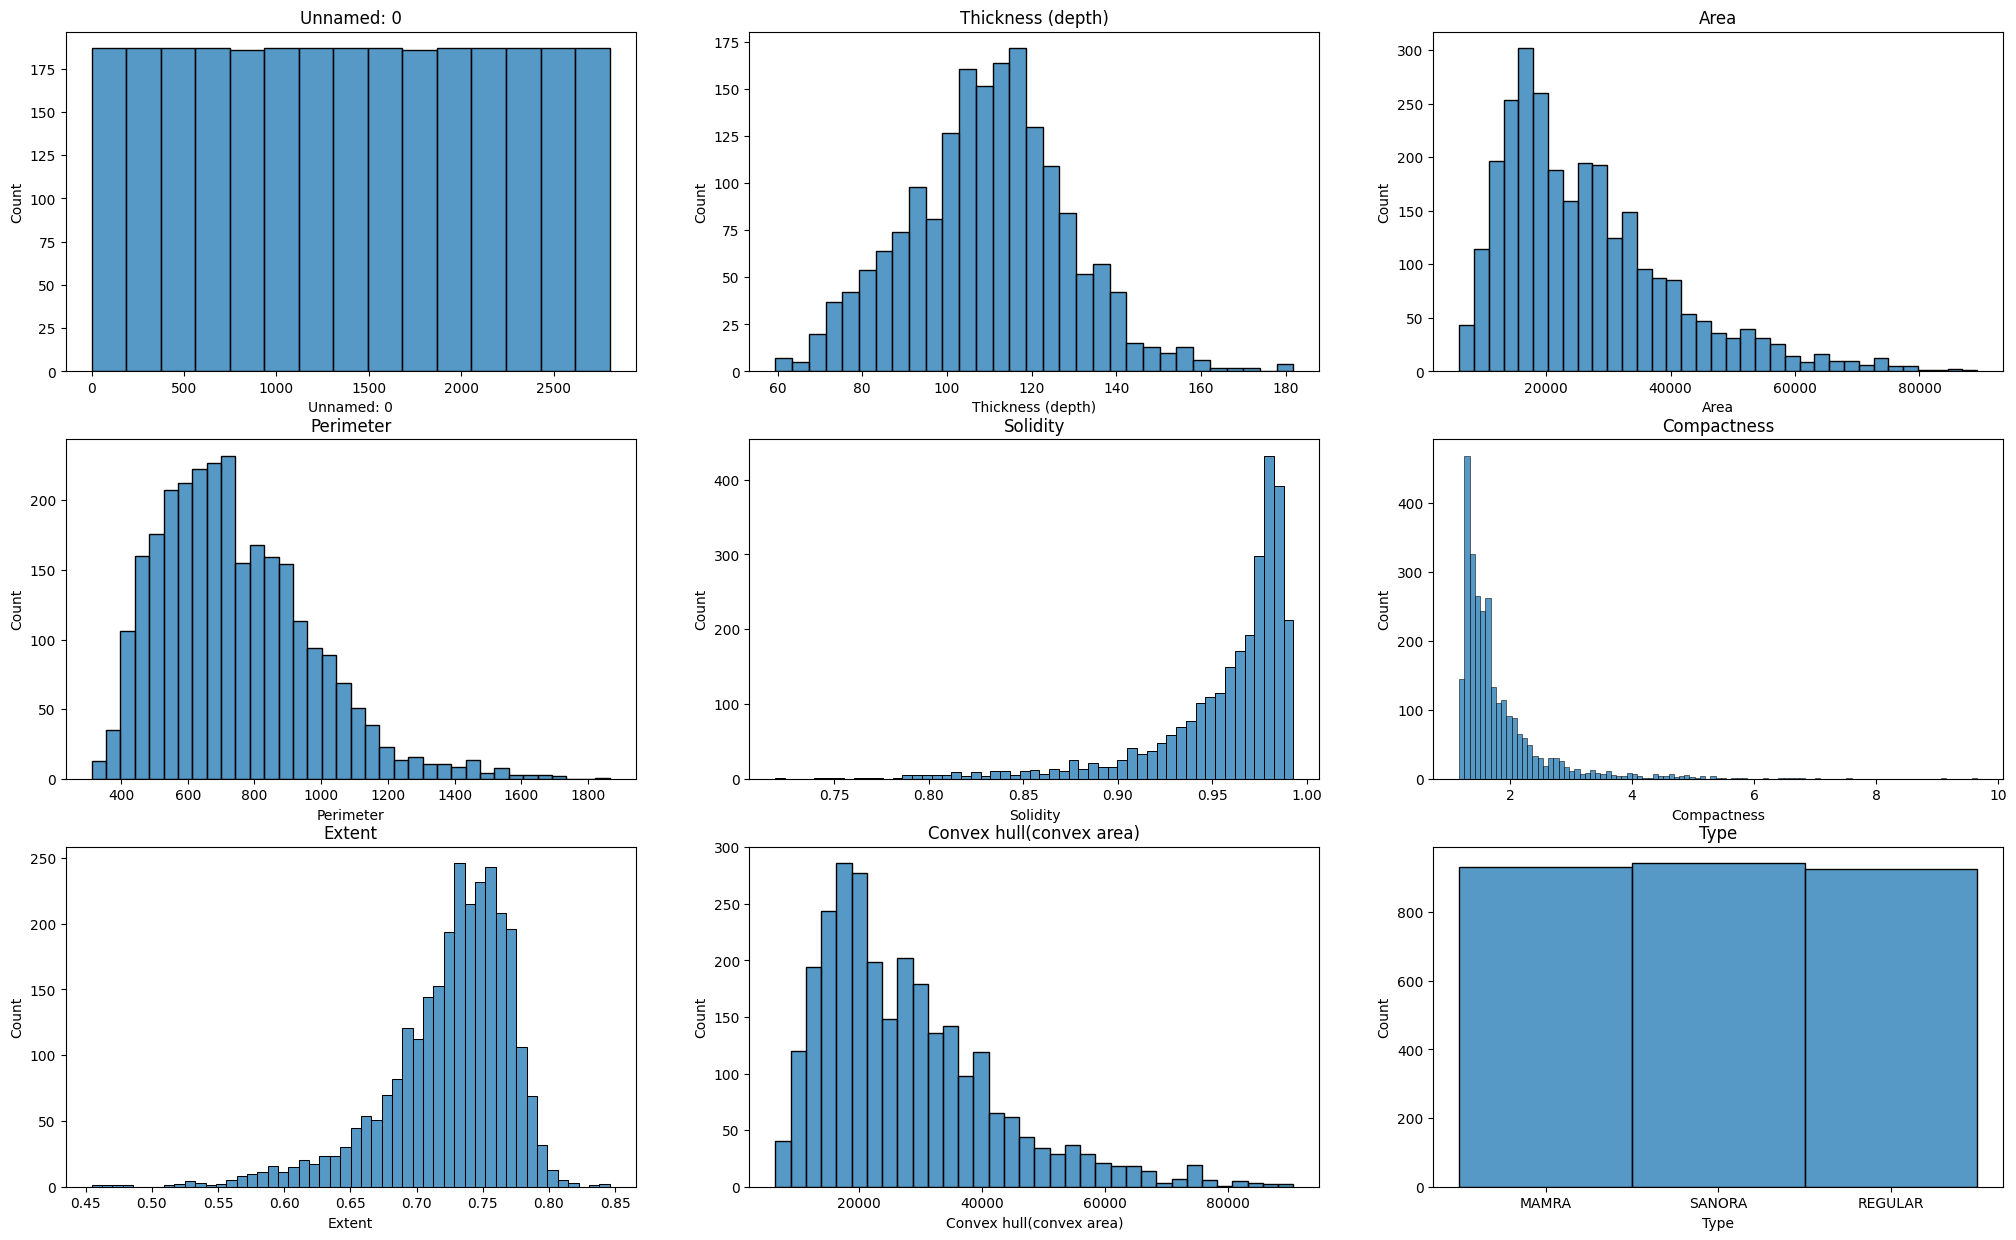

In [343]:
import seaborn


fig ,axs = plt.subplots(nrows=3, ncols=3,figsize=(25,15))

for i,j in enumerate(df.columns):
    row,col = divmod(i,3)
    seaborn.histplot(df[j],ax=axs[row,col])
    axs[row,col].set_title(j)
plt.show()

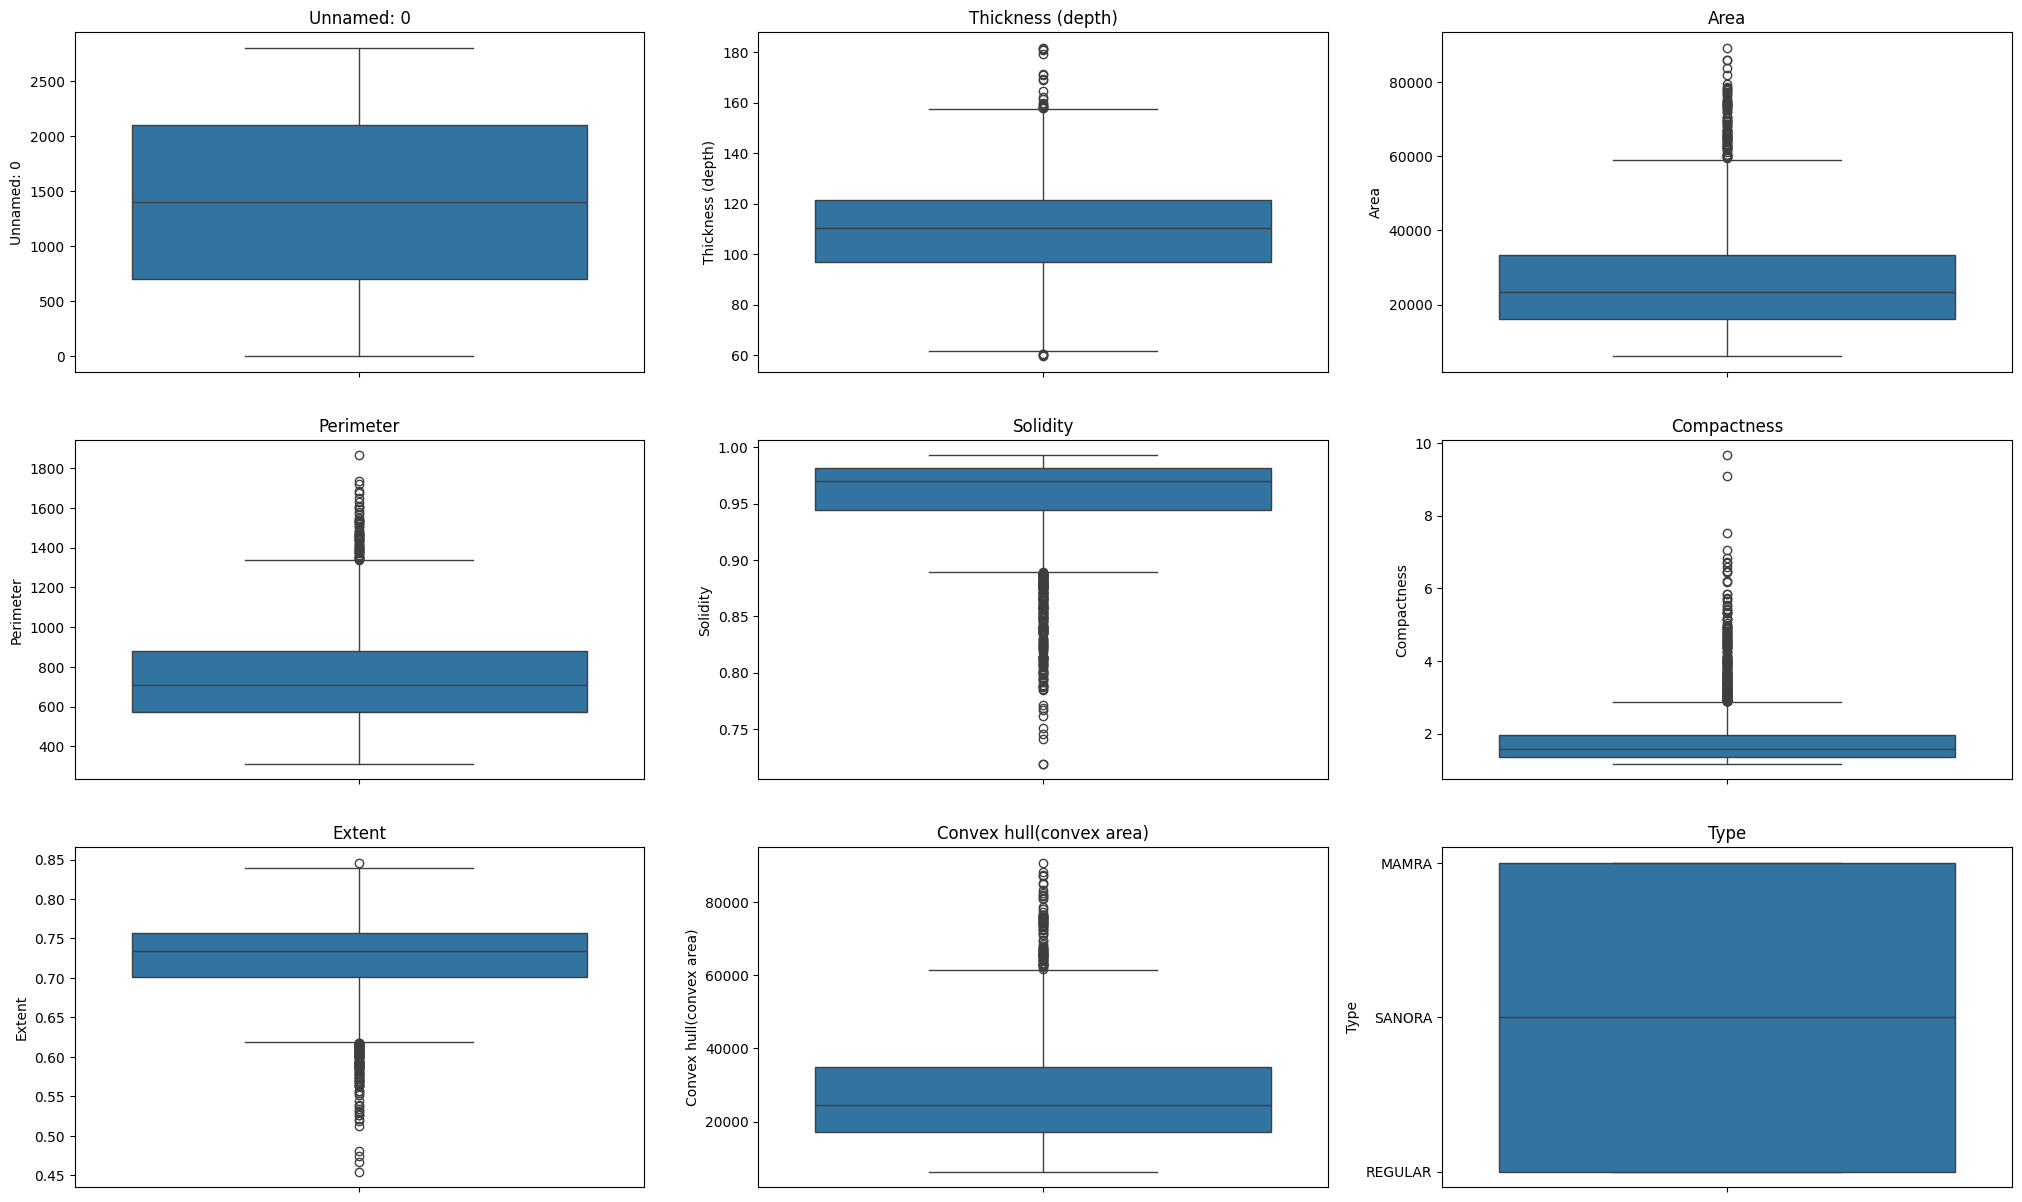

In [344]:
# import seaborn


fig ,axs = plt.subplots(nrows=3, ncols=3,figsize=(25,15))

for i,j in enumerate(df.columns):
    row,col = divmod(i,3)
    seaborn.boxplot(df[j],ax=axs[row,col])
    axs[row,col].set_title(j)
plt.show()

In [345]:
from sklearn.calibration import LabelEncoder


labenc = LabelEncoder()
df['Type'] = labenc.fit_transform(df['Type'])


In [346]:
df_new = df.copy()

for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.0 * IQR
    lower_bound = Q1 - 1.0 * IQR
    
    print(col)
    print('Upper Limit :', upper_bound)
    print('Lower Limit :', lower_bound)
    print("---")
    
    # Keep only rows within the bounds for this column
    df_new = df_new[(df_new[col] >= lower_bound) & (df_new[col] <= upper_bound)]


Unnamed: 0
Upper Limit : 3502.5
Lower Limit : -700.5
---
Thickness (depth)
Upper Limit : 145.69386291503906
Lower Limit : 72.79059219360352
---
Area
Upper Limit : 50690.5
Lower Limit : -1028.0
---
Perimeter
Upper Limit : 1186.0630505681038
Lower Limit : 264.56348806619644
---
Solidity
Upper Limit : 1.018388972423661
Lower Limit : 0.9076741017631239
---
Compactness
Upper Limit : 2.5745075801621944
Lower Limit : 0.7488434012435552
---
Extent
Upper Limit : 0.8134280321678202
Lower Limit : 0.6457956567806136
---
Convex hull(convex area)
Upper Limit : 52638.0
Lower Limit : -686.25
---
Type
Upper Limit : 4.0
Lower Limit : -2.0
---


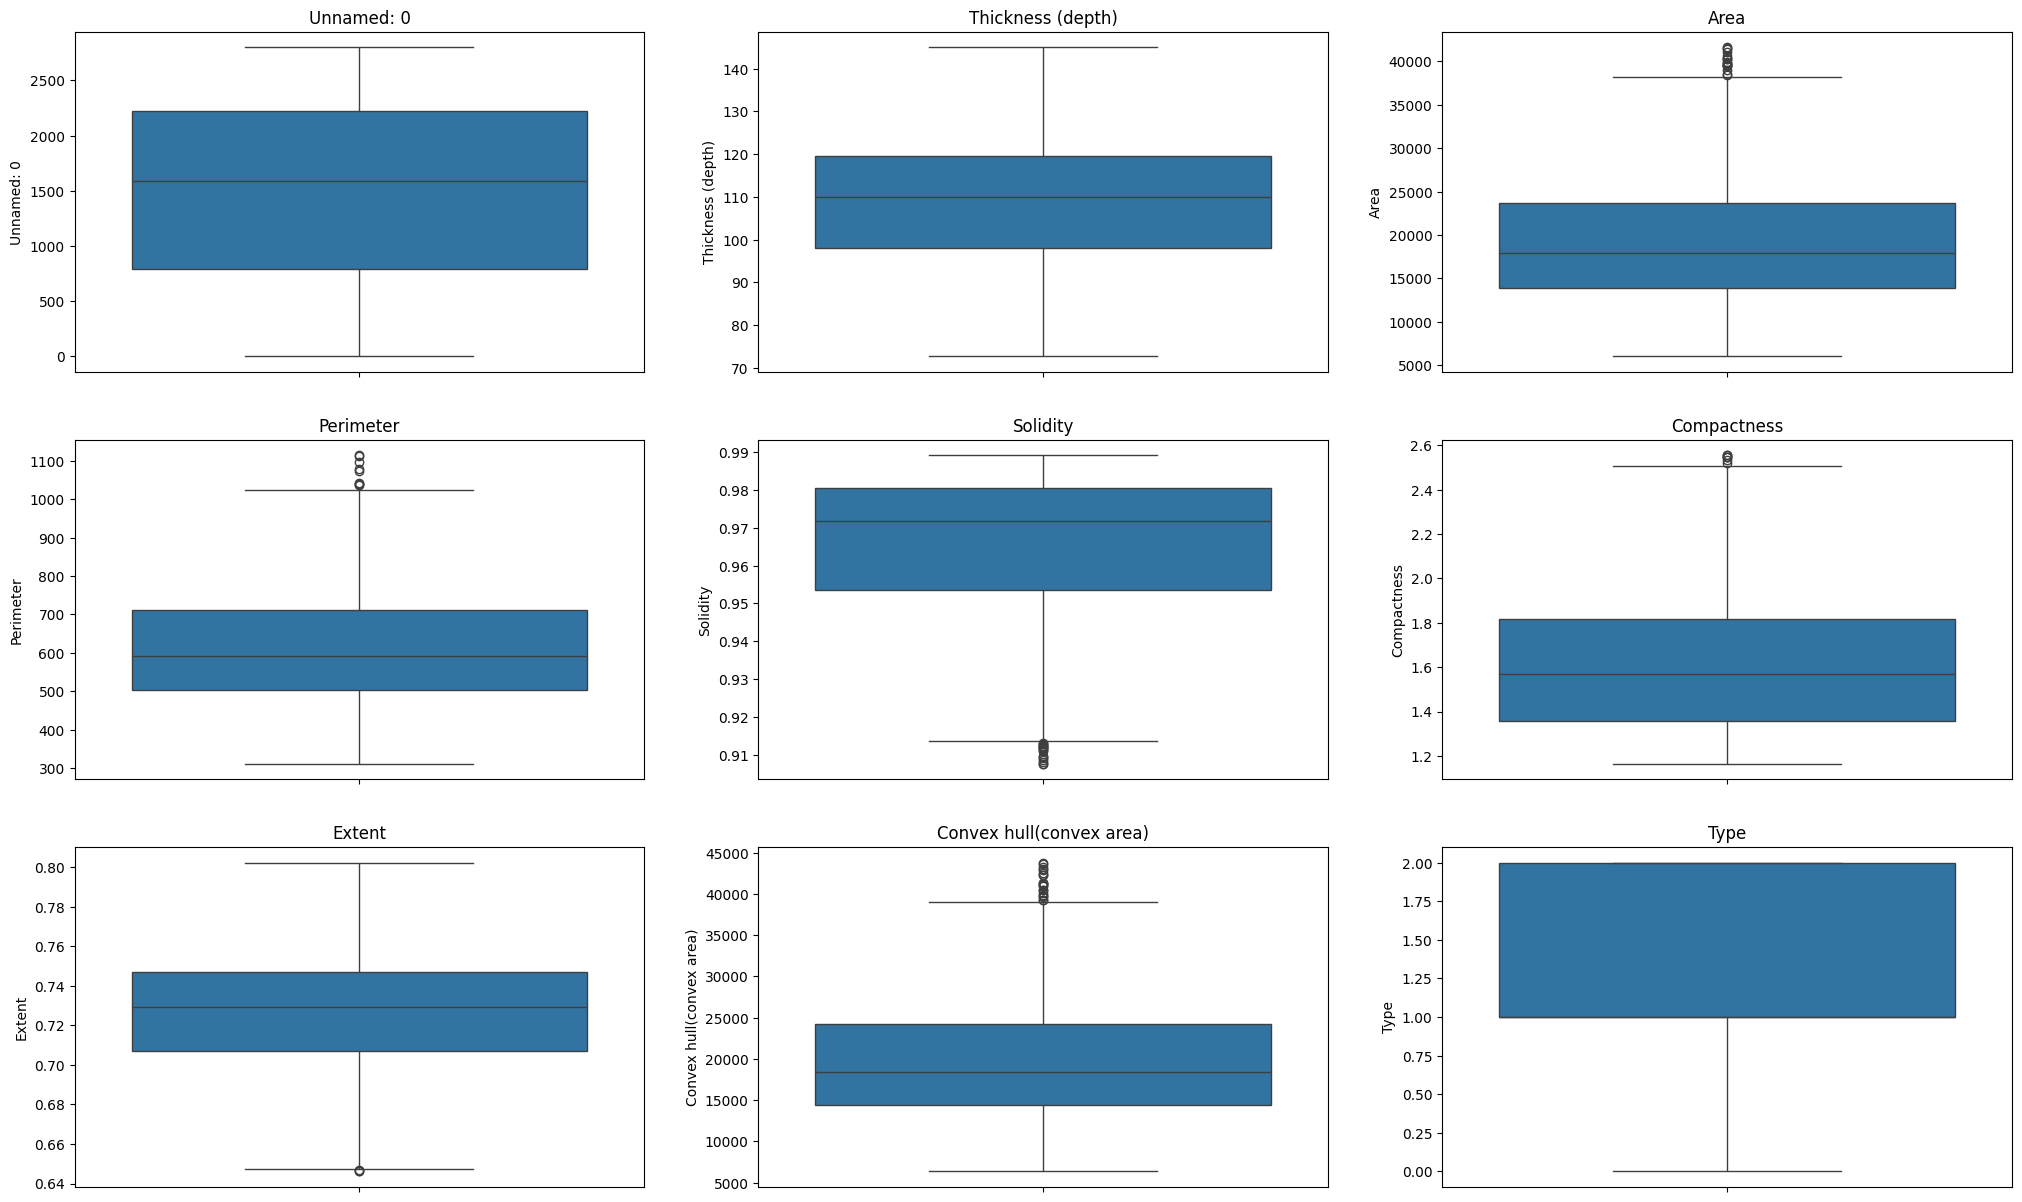

In [347]:

fig ,axs = plt.subplots(nrows=3, ncols=3,figsize=(25,15))

for i,j in enumerate(df.columns):
    row,col = divmod(i,3)
    seaborn.boxplot(df_new[j],ax=axs[row,col])
    axs[row,col].set_title(j)

In [348]:
df_new.shape

(1370, 9)

In [349]:
df.shape

(2803, 9)

In [350]:
df['Type'].value_counts()

Type
2    943
0    933
1    927
Name: count, dtype: int64

In [351]:
x_out = df_new.drop(columns=['Type'])
y_out = df_new['Type'] 

In [352]:
x_out.shape,y_out.shape

((1370, 8), (1370,))

In [353]:
x_normal = df.drop(columns='Type')
y_normal = df.Type

In [354]:
x_normal.shape,y_normal.shape

((2803, 8), (2803,))

In [355]:
from sklearn.model_selection import train_test_split


xtrain_o,xtest_o,ytrain_o,ytest_o=train_test_split(x_out,y_out,random_state=42,test_size=0.2)
xtrain_n,xtest_n,ytrain_n,ytest_n=train_test_split(x_normal,y_normal,random_state=42,test_size=0.2)

In [358]:
resi = [2,3,4]
resi = pd.DataFrame(resi,index=range(5,8))
resi.loc[resi.idxmax()]

,0
7,4


# CB Mode Gojo The Honored One

In [359]:
from catboost import CatBoostClassifier
from matplotlib.style import available
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

model_cb_n = CatBoostClassifier(verbose=False,random_state=42)
model_cb_o = CatBoostClassifier(verbose=False,random_state=42)
model_cb_n.fit(xtrain_n,ytrain_n)
model_cb_o.fit(xtrain_o,ytrain_o)

pred_cb_n = model_cb_n.predict(xtest_n) 
pred_cb_o = model_cb_o.predict(xtest_o)

print(f"D_Normal ACC = {accuracy_score(ytest_n,pred_cb_n)} / F1 = {f1_score(ytest_n,pred_cb_n,average='macro')}")
print(f"D_OUT ACC = {accuracy_score(ytest_o,pred_cb_o)} / F1 = {f1_score(ytest_o,pred_cb_o,average='macro')}")

D_Normal ACC = 0.9982174688057041 / F1 = 0.9982268374750354
D_OUT ACC = 1.0 / F1 = 1.0


# RF No Tune Mode Sukuna 10 Jari

In [360]:
from sklearn.ensemble import RandomForestClassifier


model_rf_n = RandomForestClassifier(random_state=42) 
model_rf_n.fit(xtrain_n,ytrain_n)
pred_rf_n = model_rf_n.predict(xtest_n)

model_rf_o = RandomForestClassifier(random_state=42)
model_rf_o.fit(xtrain_o,ytrain_o)
pred_rf_o = model_rf_o.predict(xtest_o)


print(f"D_Normal ACC = {accuracy_score(ytest_n,pred_rf_n)} / F1 = {f1_score(ytest_n,pred_rf_n,average='macro')}")
print(f"D_OUT ACC = {accuracy_score(ytest_o,pred_rf_o)} / F1 = {f1_score(ytest_o,pred_rf_o,average='macro')}")

D_Normal ACC = 0.9964349376114082 / F1 = 0.9964340198321892
D_OUT ACC = 0.9963503649635036 / F1 = 0.9958186924597926


# RF Tune Sukuna Mode Full Lock In 

449 Pada (16, 15, 19) D_Normal TUNED ACC = 0.9982174688057041 / F1 = 0.9982171501574295


In [381]:

# from itertools import product

from itertools import product

res_f1 =[]
res_f1.index
# kebetulan = [k for k in range(50,100)]
# crit = ['gini', 'entropy', 'log_loss']
nesti = [y for y in range(41,100)]
maxdepth = [o for o in range(41,100)]
mss = [p for p in range(41,100)]
# rndo = [k for k in range(100,150)]

for i,(p1,p2,p3) in enumerate(product(nesti,maxdepth,mss)):
    # xtrain_n,xtest_n,ytrain_n,ytest_n=train_test_split(x_normal,y_normal,random_state=j,test_size=0.2)
    # model_rf_tuned = RandomForestClassifier(random_state=87,n_estimators=50,max_depth=50,criterion='gini')
    model_rf_tuned = RandomForestClassifier(n_estimators=p1,max_depth=p2,random_state=42,min_samples_split=p3)
    model_rf_tuned.fit(xtrain_n,ytrain_n)
    pred_rf_n_tuned = model_rf_tuned.predict(xtest_n)
    print(f"{i} Pada {p1,p2,p3} D_Normal TUNED ACC = {accuracy_score(ytest_n,pred_rf_n_tuned)} / F1 = {f1_score(ytest_n,pred_rf_n_tuned,average='macro')}")
    # res_acc.append(accuracy_score(ytest_n,pred_rf_n_tuned))
    res_f1.append(f1_score(ytest_n,pred_rf_n_tuned,average='macro'))

res_f1 = pd.DataFrame(res_f1,columns=['f1'],index=range(0,len(res_f1)))

0 Pada (41, 41, 41) D_Normal TUNED ACC = 0.983957219251337 / F1 = 0.9839378127080246
1 Pada (41, 41, 42) D_Normal TUNED ACC = 0.982174688057041 / F1 = 0.9821496754486446
2 Pada (41, 41, 43) D_Normal TUNED ACC = 0.983957219251337 / F1 = 0.9839378127080246
3 Pada (41, 41, 44) D_Normal TUNED ACC = 0.982174688057041 / F1 = 0.9821496754486446
4 Pada (41, 41, 45) D_Normal TUNED ACC = 0.9803921568627451 / F1 = 0.9803684377542523
5 Pada (41, 41, 46) D_Normal TUNED ACC = 0.9803921568627451 / F1 = 0.9803684377542523
6 Pada (41, 41, 47) D_Normal TUNED ACC = 0.983957219251337 / F1 = 0.9839433293978748
7 Pada (41, 41, 48) D_Normal TUNED ACC = 0.9786096256684492 / F1 = 0.9785796105383735
8 Pada (41, 41, 49) D_Normal TUNED ACC = 0.9786096256684492 / F1 = 0.9785796105383735
9 Pada (41, 41, 50) D_Normal TUNED ACC = 0.9803921568627451 / F1 = 0.9803684377542523
10 Pada (41, 41, 51) D_Normal TUNED ACC = 0.9768270944741533 / F1 = 0.9767990628004801
11 Pada (41, 41, 52) D_Normal TUNED ACC = 0.98039215686274

KeyboardInterrupt: 

In [380]:
res_f1.loc[res_f1['f1'].idxmax()]

f1    0.998217
Name: 0, dtype: float64

## OUT

Pada 92 D_oormal TUNED ACC = 1.0 / F1 = 1.0
- 50Pada (11, 8, 4) D_oormal TUNED ACC = 1.0 / F1 = 1.0


In [386]:
# kebetulan = [k for k in range(50,100)]
crit = ['gini', 'entropy', 'log_loss']
from itertools import product
has_f1 = []
has_acc = []
nesti = [y for y in range(11,20)]
maxdepth = [o for o in range(2,10)]
mss = [p for p in range(2,10)]
# nesti = [1000,1200,1300,1500]
# maxdepth = [50,100,200,500,1000]
rndo = [k for k in range(83,100)]

for i,(p1,p2,p3) in enumerate(product(nesti,maxdepth,mss)):
    # xtrain_o,xtest_o,ytrain_o,ytest_o=train_test_split(x_oormal,y_oormal,random_state=j,test_size=0.2)
    model_rf_tuned_o = RandomForestClassifier(n_estimators=p1,
                                              max_depth=p2,
                                              min_samples_split=p3,
                                              random_state=42)
    model_rf_tuned_o.fit(xtrain_o,ytrain_o)
    pred_rf_o_tuned = model_rf_tuned_o.predict(xtest_o)
    print(f"{i}Pada {p1,p2,p3} D_oormal TUNED ACC = {accuracy_score(ytest_o,pred_rf_o_tuned)} / F1 = {f1_score(ytest_o,pred_rf_o_tuned,average='macro')}")
    has_f1.append(f1_score(ytest_o,pred_rf_o_tuned,average='macro'))
    has_acc.append(accuracy_score(ytest_o,pred_rf_o_tuned))

has_f1 = pd.DataFrame(has_f1,columns=['f1'],index=range(0,len(has_f1)))
has_acc = pd.DataFrame(has_acc,columns=['ACC'],index=range(0,len(has_acc)))

0Pada (11, 2, 2) D_oormal TUNED ACC = 0.7992700729927007 / F1 = 0.7565098300392418
1Pada (11, 2, 3) D_oormal TUNED ACC = 0.7992700729927007 / F1 = 0.7565098300392418
2Pada (11, 2, 4) D_oormal TUNED ACC = 0.7992700729927007 / F1 = 0.7565098300392418
3Pada (11, 2, 5) D_oormal TUNED ACC = 0.7992700729927007 / F1 = 0.7565098300392418
4Pada (11, 2, 6) D_oormal TUNED ACC = 0.7992700729927007 / F1 = 0.7565098300392418
5Pada (11, 2, 7) D_oormal TUNED ACC = 0.7992700729927007 / F1 = 0.7565098300392418
6Pada (11, 2, 8) D_oormal TUNED ACC = 0.7992700729927007 / F1 = 0.7565098300392418
7Pada (11, 2, 9) D_oormal TUNED ACC = 0.7992700729927007 / F1 = 0.7565098300392418
8Pada (11, 3, 2) D_oormal TUNED ACC = 0.8467153284671532 / F1 = 0.8414548255749973
9Pada (11, 3, 3) D_oormal TUNED ACC = 0.8467153284671532 / F1 = 0.8414548255749973
10Pada (11, 3, 4) D_oormal TUNED ACC = 0.8467153284671532 / F1 = 0.8414548255749973
11Pada (11, 3, 5) D_oormal TUNED ACC = 0.8467153284671532 / F1 = 0.8414548255749973
12

In [387]:
has_f1.loc[has_f1['f1'].idxmax()]

f1    1.0
Name: 50, dtype: float64

In [388]:
has_acc.loc[has_acc['ACC'].idxmax()]

ACC    1.0
Name: 50, dtype: float64